In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# importing the dataset from file Customer.csv
Customers = pd.read_csv("Customer.csv")
Customers.info() # To get the concise summary of Customers dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [3]:
# importing the dataset from file prod_cat_info.csv
Product_Hierarchy = pd.read_csv('prod_cat_info.csv')
Product_Hierarchy.info() # To get the concise summary of Product_Hierarchy dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [4]:
# importing the dataset from file Transactions.csv
Transactions = pd.read_csv('Transactions.csv')
Transactions.info() # To get the concise summary of Transactions dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


# Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [5]:
# Joining the datasets Transactions and Product_Hierarchy
Trans = pd.merge(left=Transactions, right=Product_Hierarchy, how='left', 
                 left_on=['prod_cat_code','prod_subcat_code'],
                 right_on=['prod_cat_code', 'prod_sub_cat_code'])
Trans.info() # To get the concise summary of merged dataset i.e. Trans

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_subcat_code   23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  prod_cat           23053 non-null  object 
 11  prod_sub_cat_code  23053 non-null  int64  
 12  prod_subcat        23053 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 2.5+ MB


In [6]:
# To check whether there is a difference in columns prod_subcat_code and prod_sub_cat_code.
(Trans.prod_subcat_code == Trans.prod_sub_cat_code).value_counts()

True    23053
dtype: int64

In [7]:
# Since there is no difference in both these columns, so we'll drop the column prod_sub_cat_code 
# from Trans dataset.
Trans.drop(columns= 'prod_sub_cat_code', inplace=True)

In [8]:
# To get the concise summary of merged dataset i.e. Trans after removing the column prod_sub_cat_code
Trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  prod_cat          23053 non-null  object 
 11  prod_subcat       23053 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 2.3+ MB


In [9]:
# Joining the datasets Trans and Customers
Customer_Final = pd.merge(left=Trans, right=Customers, how='left', left_on='cust_id', right_on='customer_Id')
Customer_Final.info() # To get the concise summary of merged dataset i.e. Customer_Final

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  prod_cat          23053 non-null  object 
 11  prod_subcat       23053 non-null  object 
 12  customer_Id       23053 non-null  int64  
 13  DOB               23053 non-null  object 
 14  Gender            23044 non-null  object 
 15  city_code         23045 non-null  float64
dtypes: float64(3), int64(7), object(6)
memor

In [10]:
# To check whether there is a difference in columns cust_id and customer_Id.
(Customer_Final.cust_id == Customer_Final.customer_Id).value_counts()

True    23053
dtype: int64

In [11]:
# Since there is no difference in both these columns, so we'll drop the column customer_Id from 
# Customer_Final dataset.
Customer_Final.drop(columns= 'customer_Id', inplace=True)

In [12]:
# To get the concise summary of merged dataset i.e. Customer_Final after removing the column customer_Id
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  prod_cat          23053 non-null  object 
 11  prod_subcat       23053 non-null  object 
 12  DOB               23053 non-null  object 
 13  Gender            23044 non-null  object 
 14  city_code         23045 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


# Prepare a summary report for the merged data set.

## Get the column names and their corresponding data types

In [13]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
DOB                  object
Gender               object
city_code           float64
dtype: object

In [14]:
# changing the data type of the column tran_date as datetime
Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
Customer_Final.tran_date.head(2)

0   2014-02-28
1   2014-02-27
Name: tran_date, dtype: datetime64[ns]

In [15]:
# changing the data type of the column DOB as datetime
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB)
Customer_Final.DOB.head(2)

0   1981-09-26
1   1973-11-05
Name: DOB, dtype: datetime64[ns]

In [16]:
# Getting the concise summary of Customer_Final dataset after changing the data types of few columns
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  prod_cat          23053 non-null  object        
 11  prod_subcat       23053 non-null  object        
 12  DOB               23053 non-null  datetime64[ns]
 13  Gender            23044 non-null  object        
 14  city_code         2304

## Top/Bottom 10 observations

In [17]:
# Top 10 observations
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,1981-08-06,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,1982-09-10,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,1971-04-11,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,1979-11-27,F,3.0


In [18]:
# Bottom 10 observations
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,1976-10-08,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,1991-12-10,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,1982-01-15,M,1.0


## "Five-number summary" for continuous variables (min, Q1, median, Q3 and max)

In [19]:
Customer_Final.loc[:, ['Qty', 'Rate', 'Tax', 'total_amt']].describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,23053.0,2.432395,2.268406,-5.000,1.00,3.00,4.000,5.0
Rate,23053.0,636.369713,622.363498,-1499.000,312.00,710.00,1109.000,1500.0
Tax,23053.0,248.667192,187.177773,7.350,98.28,199.08,365.715,787.5
total_amt,23053.0,2107.308002,2507.561264,-8270.925,762.45,1754.74,3569.150,8287.5


## Frequency tables for all the categorical variables

In [20]:
def cat_summ(x):
    cat_s = x.value_counts()
    cat_s1 = x.notna().sum()
    freq_dist=pd.concat([cat_s, cat_s.cumsum(), cat_s/cat_s1, (cat_s/cat_s1).cumsum()], axis=1).reset_index()
    freq_dist.columns = [x.name, 'Frequency', 'Cumulative Frequency', 
                     'Relative Frequency', 'Cumulative Relative Frequency']
    return freq_dist

In [21]:
# To apply the udf cat_summ on any categorical variable.
cat_summ(Customer_Final.Gender)

,Gender,Frequency,Cumulative Frequency,Relative Frequency,Cumulative Relative Frequency
0,M,11811,11811,0.512541,0.512541
1,F,11233,23044,0.487459,1.000000


In [22]:
# To get the frequency distribution of all the categorical variables.
col_name = ['prod_subcat_code', 'prod_cat_code', 'Store_type', 'prod_cat', 'prod_subcat', 'Gender', 'city_code']
for i in col_name:
    print(cat_summ(Customer_Final.loc[:, i]))

    prod_subcat_code  Frequency  Cumulative Frequency  Relative Frequency  \
0                  4       4002                  4002            0.173600   
1                  3       3067                  7069            0.133041   
2                 10       2993                 10062            0.129831   
3                  1       2950                 13012            0.127966   
4                 11       2058                 15070            0.089273   
5                 12       2029                 17099            0.088015   
6                  7       1043                 18142            0.045244   
7                  2       1007                 19149            0.043682   
8                  6        989                 20138            0.042901   
9                  9        985                 21123            0.042728   
10                 8        972                 22095            0.042164   
11                 5        958                 23053            0.041556   

# Generate histograms for all continuous variables and frequency bars for categorical variables.

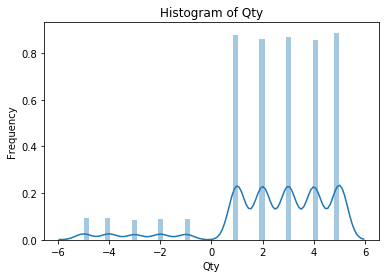

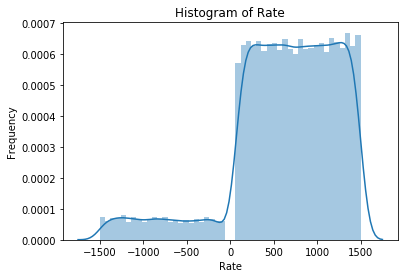

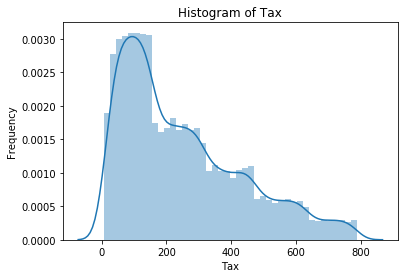

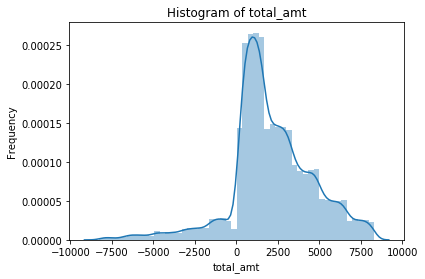

Qty          None
Rate         None
Tax          None
total_amt    None
dtype: object

In [23]:
# Generating the histograms for all the continuous variables.
def num_plot(x):
    plt.ylabel('Frequency')
    plt.title("Histogram of " + x.name)
    sns.distplot(x)
    plt.show()
Customer_Final.loc[:, ['Qty', 'Rate', 'Tax', 'total_amt']].apply(lambda x: num_plot(x))

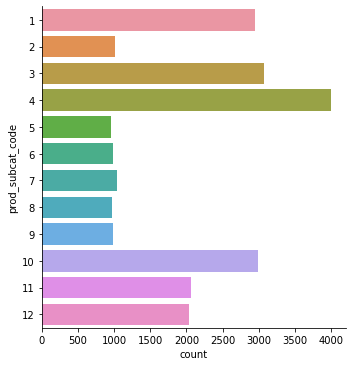

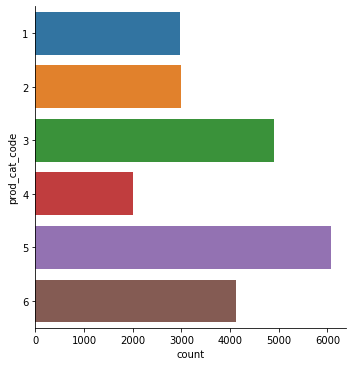

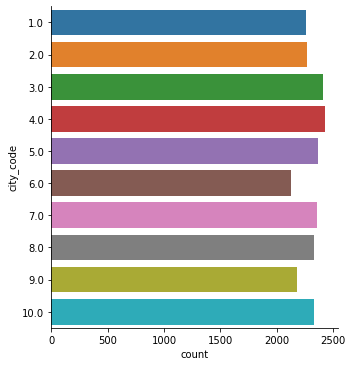

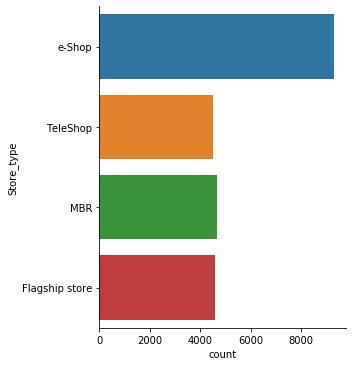

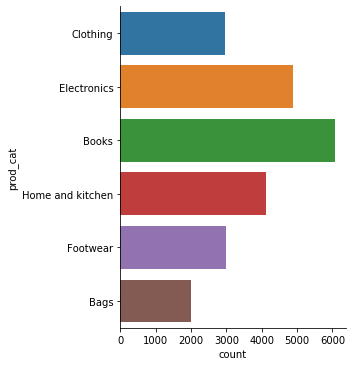

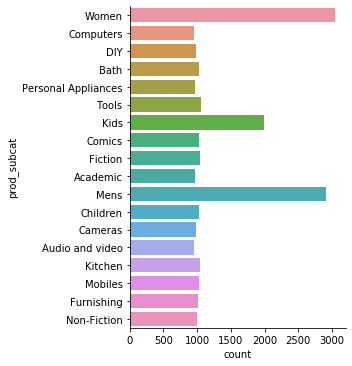

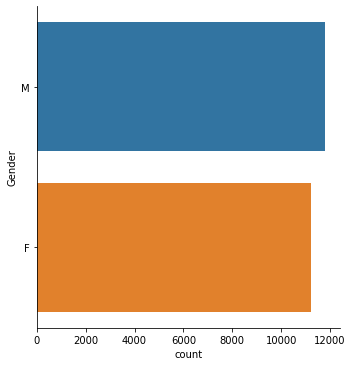

prod_subcat_code    None
prod_cat_code       None
city_code           None
Store_type          None
prod_cat            None
prod_subcat         None
Gender              None
dtype: object

In [24]:
# Generating the frequency bars for categorical variables.
col_name = ['prod_subcat_code', 'prod_cat_code', 'city_code', 'Store_type', 'prod_cat', 'prod_subcat', 'Gender']
def cat_plot(z):
    sns.catplot(y = z.name, kind = 'count', data = Customer_Final)
    plt.show()
Customer_Final.loc[:, col_name].apply(lambda x: cat_plot(x))

# Calculate the following information using the merged dataset :
## Time period of the available transaction data

In [25]:
# To get the date of first transaction made by any customer. 
Customer_Final.tran_date.min()

Timestamp('2011-01-02 00:00:00')

In [26]:
# To get the date of latest transaction made by any customer. 
Customer_Final.tran_date.max()

Timestamp('2014-12-02 00:00:00')

In [27]:
# Duration of the transaction data
Customer_Final.tran_date.max() - Customer_Final.tran_date.min()

Timedelta('1430 days 00:00:00')

**Remark:** The transaction data is available from 2nd January, 2011 till 2nd December, 2014. The transaction data of 1430 days is available with us.

## Count of transactions where the total amount of transaction was negative

In [28]:
Customer_Final.loc[Customer_Final.total_amt<0].shape[0]

2177

**Remark:** There were 2177 transactions where the total amount of transaction was negative.

# Analyze which product categories are more popular among females vs male customers.

In [29]:
# To get the count of various products purchased by males vs. females sorted in descending order by Females
pd.crosstab(Customer_Final.prod_cat, Customer_Final.Gender).sort_values(by = 'F', ascending = False)

Gender,F,M
prod_cat,,
Books,2949,3116
Electronics,2328,2570
Home and kitchen,1994,2134
Footwear,1529,1469
Clothing,1439,1518
Bags,994,1004


In [30]:
# To get the count of various products purchased by males vs. females sorted in descending order by Males
pd.crosstab(Customer_Final.prod_cat, Customer_Final.Gender).sort_values(by = 'M', ascending = False)

Gender,F,M
prod_cat,,
Books,2949,3116
Electronics,2328,2570
Home and kitchen,1994,2134
Clothing,1439,1518
Footwear,1529,1469
Bags,994,1004


**Remark:** The product category "Books" is more popular amongst both females and males.

# Which City code has the maximum customers and what was the percentage of customers from that city?

In [31]:
# Total number of customers from all the cities
len(Customer_Final.cust_id.unique())

5506

In [32]:
x = list(Customer_Final.city_code.unique()[~np.isnan(Customer_Final.city_code.unique())])
y = []
for i in x:
    y.append(len(Customer_Final.loc[Customer_Final.city_code == i].cust_id.unique()))
city_cust = pd.DataFrame({'city_codes':x,'Number_of_Customers_in_each_city':y})
city_cust['Percentage_of_Customers_in_each_city'] = round(city_cust.Number_of_Customers_in_each_city/city_cust.Number_of_Customers_in_each_city.sum()*100,2)
city_cust.sort_values(by = 'Number_of_Customers_in_each_city', ascending = False).reset_index(drop = True)

,city_codes,Number_of_Customers_in_each_city,Percentage_of_Customers_in_each_city
0,3.0,576,10.47
1,5.0,570,10.36
2,4.0,569,10.34
3,7.0,563,10.23
4,8.0,551,10.01
5,2.0,546,9.92
6,10.0,546,9.92
7,1.0,535,9.72
8,9.0,532,9.67
9,6.0,516,9.38


**Remark:** The city code 3.0 has maximum customers and the percentage of customers in that city is 10.47%.

# Which store type sells the maximum products by value and by quantity?

In [33]:
#pd.pivot_table(Customer_Final, index = 'Store_type', values=['total_amt','Qty'], aggfunc=sum).round(2).sort_values(by = 'total_amt', ascending = False)
Customer_Final.groupby('Store_type')[['total_amt','Qty']].sum().round(2).sort_values(by = 'total_amt', ascending = False)

,total_amt,Qty
Store_type,,
e-Shop,19824816.05,22763
Flagship store,9715688.19,11133
MBR,9674486.06,11194
TeleShop,9364781.07,10984


**Remark:** The store type "e-Shop" has sold the maximum products by both value and quantity. 

# What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [34]:
# Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores individually
Customer_Final.loc[(Customer_Final.Store_type == 'Flagship store') & (Customer_Final.prod_cat.isin(['Electronics', 'Clothing'])), ['prod_cat','total_amt']].groupby('prod_cat').total_amt.sum()

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: total_amt, dtype: float64

In [35]:
# Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores in total.
Customer_Final.loc[(Customer_Final.Store_type == 'Flagship store') & (Customer_Final.prod_cat.isin(['Electronics', 'Clothing'])), 'total_amt'].sum()

3409559.27

# What was the total amount earned from "Male" customers under the "Electronics" category?

In [36]:
Customer_Final.loc[(Customer_Final.prod_cat == 'Electronics') & (Customer_Final.Gender == 'M'), 'total_amt'].sum().round(2)

5703109.42

# How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [37]:
out = Customer_Final[Customer_Final.total_amt >= 0].cust_id.value_counts()
len(out[out>10])

6

**Remark:** 6 customers have more than 10 unique transactions excluding the orders they have returned.

# For all customers aged between 25 - 35, find out:

In [38]:
# Creating a derived variable 'Age_in_Years' displaying the age of all the customers as of now.
# dt- Accessor object for datetime like properties of the Timedelta type Series values.
Customer_Final['Age_in_Years'] = ((pd.Timestamp.now()-Customer_Final.DOB).dt.days/365.25).apply(lambda x: math.floor(x))
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB,Gender,city_code,Age_in_Years
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,1981-09-26,M,5.0,38
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,1973-11-05,F,8.0,46


## What was the total amount spent for “Electronics” and “Books” product categories?

In [39]:
# Total amount spent for “Electronics” and “Books” product categories separately.
Customer_Final.loc[((Customer_Final.Age_in_Years >= 25) & (Customer_Final.Age_in_Years <= 35)) &
                   Customer_Final.prod_cat.isin(['Electronics', 'Books']),
                   ['prod_cat', 'total_amt']].groupby('prod_cat').total_amt.sum()

prod_cat
Books          4579434.925
Electronics    4117904.050
Name: total_amt, dtype: float64

In [40]:
# Total amount spent for “Electronics” and “Books” product categories in total.
Customer_Final.loc[(Customer_Final.Age_in_Years.between(25, 35, inclusive = True)) & 
                    Customer_Final.prod_cat.isin(['Electronics', 'Books']), 
                   ['prod_cat', 'total_amt']].total_amt.sum().round(2)

8697338.98

## What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [41]:
d1 = pd.to_datetime('2014-01-01')
d2 = pd.to_datetime('2014-03-01', format='%Y-%m-%d')
Customer_Final.loc[(Customer_Final.Age_in_Years.between(25, 35, inclusive = True)) & 
                   (Customer_Final.tran_date.between(d1, d2, inclusive = True)), 'total_amt'].sum()

588067.74